In [ ]:
from google.colab import files
uploaded = files.upload('Mall_Customer.csv')

Saving Mall_Customers.csv to Mall_Customer.csv/Mall_Customers.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


In [ ]:
df = pd.read_csv('Mall_Customer.csv/Mall_Customers.csv')
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [ ]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]


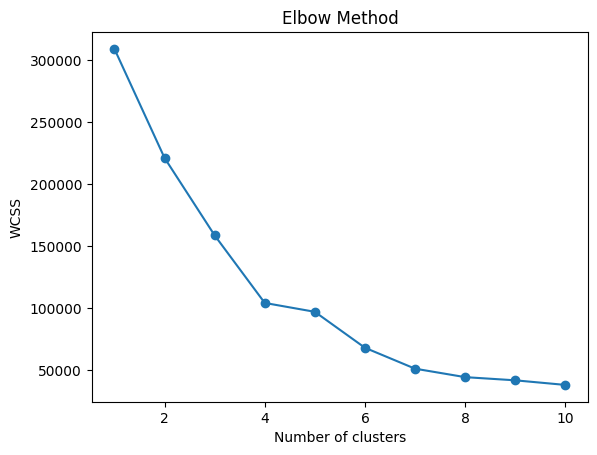

In [ ]:
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(X)
    wcss.append(km.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)
y_kmeans = kmeans.fit_predict(X)
df['Cluster'] = y_kmeans


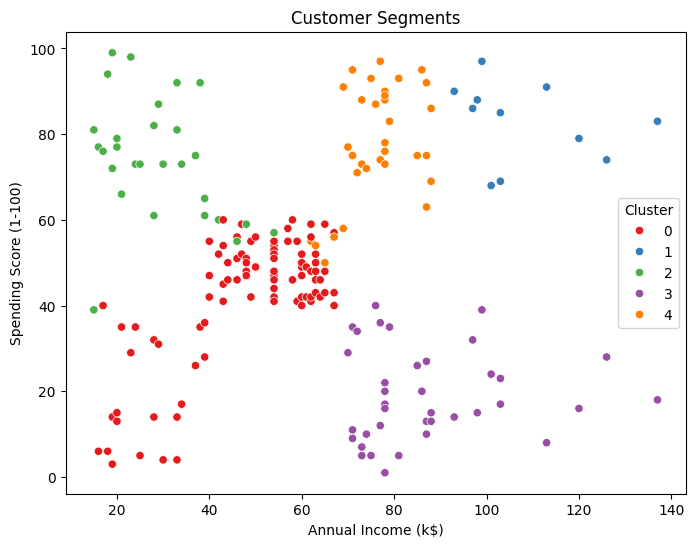

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='Set1')
plt.title('Customer Segments')
plt.show()


In [ ]:
# Check average values in each cluster
cluster_summary = df.groupby('Cluster').mean(numeric_only=True)
print(cluster_summary)


         CustomerID    Gender        Age  Annual Income (k$)  \
Cluster                                                        
0         69.247191  0.617978  46.213483           47.719101   
1        190.000000  0.545455  32.454545          108.181818   
2         30.586207  0.517241  24.689655           29.586207   
3        162.000000  0.473684  40.394737           87.000000   
4        145.575758  0.545455  31.787879           76.090909   

         Spending Score (1-100)  
Cluster                          
0                     41.797753  
1                     82.727273  
2                     73.655172  
3                     18.631579  
4                     77.757576  


In [ ]:
df.to_csv("clustered_customers.csv", index=False)
